/var/folders/ln/kls56lq93mq4z_459sxk1vbh0000gn/T/ipykernel_88178/2102651942.py:12: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(TICKER)
[*********************100%***********************]  1 of 1 completed

222 trades taken
Bull Average Returns: 0.06%
776 trades taken
Bear Average Returns: 0.27%


Price,Close,High,Low,Open,Volume,High_2prev,Bull_FVG,Bull_FVG_Value,Bear_FVG,Bear_FVG_Value,Return_In_5P_Ago
Date,,,,,,,,,,,
2021-07-06,409.113129,410.133731,406.353783,409.916373,68710400,NaN,0,NaN,0,NaN,1.006144
2021-07-07,410.558929,410.842443,407.771236,409.802952,63549500,NaN,0,NaN,0,NaN,1.004097
2021-07-08,407.213654,407.979090,404.000676,405.191368,97595200,410.133731,0,-0.000000,1,-0.015061,1.008888
2021-07-09,411.560577,411.862980,407.015194,408.735077,76238600,410.842443,0,-0.000000,1,-0.009299,0.990402
2021-07-12,413.034790,413.289955,411.040882,411.475568,52889600,407.979090,1,0.007413,0,0.000000,0.972293
...,...,...,...,...,...,...,...,...,...,...,...
2025-06-23,600.150024,600.539978,591.890015,595.039978,87426000,599.447843,0,-0.000000,1,-0.012593,NaN
2025-06-24,606.780029,607.849976,603.409973,604.330017,67735300,599.460022,1,0.006510,0,0.000000,NaN
2025-06-25,607.119995,608.609985,605.539978,607.909973,62114800,600.539978,1,0.008236,0,0.000000,NaN


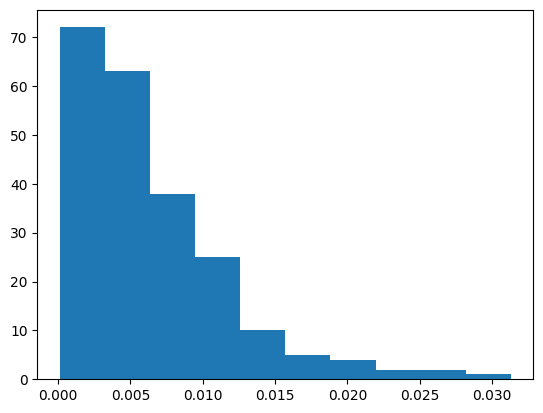

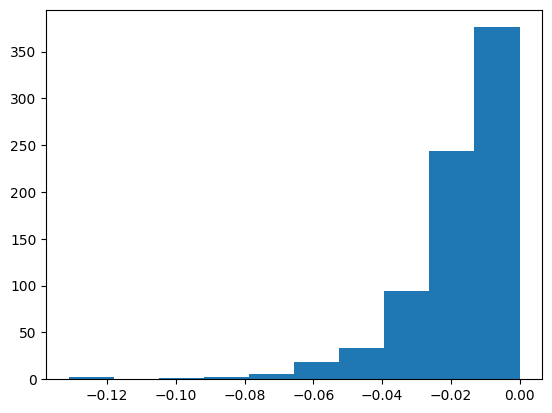

In [31]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

TICKER = "SPY"
LOOKBACK = 1000
HOLDING_PERIOD = 5


def get_data():
    df = yf.download(TICKER)
    df.columns = df.columns.get_level_values(0)
    return df.iloc[-LOOKBACK:, :]


def bull_fvg(df):

    df["High_2prev"] = df["High"].shift(2)
    df["Bull_FVG"] = (df["Low"] > df["High_2prev"]).astype(int)
    df["Bull_FVG_Value"] = (df["Low"] - df["High_2prev"]) * df["Bull_FVG"] / df["Close"]

    fvg_subset = df[df["Bull_FVG_Value"] > 0]

    plt.hist(fvg_subset["Bull_FVG_Value"], bins=10)

    return df

def bear_fvg(df):

    df["High_2prev"] = df["High"].shift(2)
    df["Bear_FVG"] = (df["Low"] < df["High_2prev"]).astype(int)
    df["Bear_FVG_Value"] = (df["Low"] - df["High_2prev"]) * df["Bear_FVG"] / df["Close"]

    fvg_subset = df[df["Bear_FVG_Value"] < 0]

    plt.figure()
    plt.hist(fvg_subset["Bear_FVG_Value"], bins=10)

    return df


def assess_bull_FVG(df, holding_period=HOLDING_PERIOD):
    df[f"Return_In_{holding_period}P_Ago"] = df["Close"].shift(-HOLDING_PERIOD) / df["Close"]
    fvg_subset = df[df["Bull_FVG_Value"] > 0]

    print(f"{len(fvg_subset)} trades taken")
    print(
        f"Bull Average Returns: {round((fvg_subset[f"Return_In_{holding_period}P_Ago"].mean() - 1) * 100, 2)}%"
    )

    return fvg_subset["Bull_FVG_Value"].mean()


def assess_bear_FVG(df, holding_period=HOLDING_PERIOD):
    df[f"Return_In_{holding_period}P_Ago"] = (
        df["Close"].shift(-HOLDING_PERIOD) / df["Close"]
    )
    fvg_subset = df[df["Bear_FVG_Value"] < 0]

    print(f"{len(fvg_subset)} trades taken")
    print(
        f"Bear Average Returns: {round((fvg_subset[f"Return_In_{holding_period}P_Ago"].mean()  - 1 )* 100, 2)}%"
    )
    return df


def test_strategy(df):
    
    return df


def main():
    df = get_data()
    df = bull_fvg(df)
    df = bear_fvg(df)
    assess_bull_FVG(df)
    assess_bear_FVG(df)

    return df 
df = main()
df